In [1]:
import xarray as xr 
import numpy as np
import matplotlib.pyplot as plt
from math import nan
import pandas as pd

from qtrendutils import filter_utils as filt
from qtrendutils import averaging_utils as avg
from qtrendutils import calendar_utils as cal
from qtrendutils import linfit_utils as linfit

import sys

In [2]:
plotpath="/project/cas/islas/python_plots/qtrend_paper/figures/supplemental/"

In [3]:
basepath="/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/global_avgs/"
era5_q = xr.open_dataset(basepath+"ERA5_q.nc")*1000.
era5_q_anoms = era5_q - era5_q.sel(time=slice("1980-01-01","1989-12-31")).mean('time')
era5_q_12m = filt.runningmean(era5_q_anoms, 12, timeaxis='time', dropna=False)
era5_q_am = cal.calcannualmean(era5_q_anoms)
timemonth = np.arange(0,era5_q.time.size,1)*(1./12.) + 1980

era5_relhum = xr.open_dataset(basepath+"ERA5_relhum.nc")
era5_relhum_anoms = era5_relhum - era5_relhum.sel(time=slice("1980-01-01","1989-12-31")).mean('time')
era5_relhum_12m = filt.runningmean(era5_relhum_anoms, 12, timeaxis='time', dropna=False)
era5_relhum_am = cal.calcannualmean(era5_relhum_anoms)

era5_tas = xr.open_dataset(basepath+"ERA5_tas.nc")
era5_tas_anoms = era5_tas - era5_tas.sel(time=slice("1980-01-01","1989-12-31")).mean('time')
era5_tas_12m = filt.runningmean(era5_tas_anoms, 12, timeaxis='time', dropna=False)
era5_tas_am = cal.calcannualmean(era5_tas_anoms)

gpcc_pr = xr.open_dataset(basepath+"GPCC_pr.nc")
gpcc_pr_anoms = gpcc_pr - gpcc_pr.sel(time=slice("1980-01-01","1989-12-31")).mean('time')
gpcc_pr_am = cal.calcannualmean(gpcc_pr_anoms)
gpcc_pr_12m = filt.runningmean(gpcc_pr_anoms, 12, timeaxis='time', dropna=False)

In [58]:
amip6_q = xr.open_dataset(basepath+'AMIP6_q.nc')*1000.
amip6_q = amip6_q.drop_sel(model=['FGOALS-g3','CMCC-CM2-HR4'])
amip6_q_anoms = amip6_q - amip6_q.sel(time=slice("1980-01-01","1989-12-31")).mean('time')
amip6_q_12m = filt.runningmean(amip6_q_anoms, 12, timeaxis='time', dropna=False)
amip6_q_am = cal.calcannualmean(amip6_q_anoms)
timemonth_amip = np.arange(0,amip6_q.time.size,1)*(1./12.) + 1980

amip6_q_memm = amip6_q_12m.mean('member')
amip6_q_em = amip6_q_memm.mean('model')
amip6_q_am_memm = amip6_q_am.mean('member')
amip6_q_am_em = amip6_q_am_memm.mean('model')

amip6_q_12m_stack = amip6_q_12m.stack(z=('member','model'))
amip6_q_12m_stack = amip6_q_12m_stack.where( ~np.isnan(amip6_q_12m_stack.isel(time=240)), drop=True)
amip6_q_am_stack = amip6_q_am.stack(z=('member','model'))
amip6_q_am_stack = amip6_q_am_stack.where( ~np.isnan(amip6_q_am_stack.isel(year=0)), drop=True)

amip6_pr = xr.open_dataset(basepath+'AMIP6_pr.nc')
amip6_pr = amip6_pr.drop_sel(model=['FGOALS-g3','CMCC-CM2-HR4'])
amip6_pr_anoms = amip6_pr - amip6_pr.sel(time=slice("1980-01-01","1989-12-31")).mean('time')
amip6_pr_12m = filt.runningmean(amip6_pr_anoms, 12, timeaxis='time', dropna=False)
amip6_pr_am = cal.calcannualmean(amip6_pr_anoms)

amip6_pr_memm = amip6_pr_12m.mean('member')
amip6_pr_em = amip6_pr_memm.mean('model')
amip6_pr_am_memm = amip6_pr_am.mean('member')
amip6_pr_am_em = amip6_pr_am_memm.mean('model')

amip6_pr_12m_stack = amip6_pr_12m.stack(z=('member','model'))
amip6_pr_12m_stack = amip6_pr_12m_stack.where( ~np.isnan(amip6_pr_12m_stack.isel(time=240)), drop=True)
amip6_pr_am_stack = amip6_pr_am.stack(z=('member','model'))
amip6_pr_am_stack = amip6_pr_am_stack.where( ~np.isnan(amip6_pr_am_stack.isel(year=0)), drop=True)


amip6_relhum = xr.open_dataset(basepath+'AMIP6_relhum.nc')
amip6_relhum = amip6_relhum.drop_sel(model=['FGOALS-g3','CMCC-CM2-HR4'])
amip6_relhum_anoms = amip6_relhum - amip6_relhum.sel(time=slice("1980-01-01","1989-12-31")).mean('time')
amip6_relhum_12m = filt.runningmean(amip6_relhum_anoms, 12, timeaxis='time', dropna=False)
amip6_relhum_am = cal.calcannualmean(amip6_relhum_anoms)

amip6_relhum_memm = amip6_relhum_12m.mean('member')
amip6_relhum_em = amip6_relhum_memm.mean('model')
amip6_relhum_am_memm = amip6_relhum_am.mean('member')
amip6_relhum_am_em = amip6_relhum_am_memm.mean('model')

amip6_relhum_12m_stack = amip6_relhum_12m.stack(z=('member','model'))
amip6_relhum_12m_stack = amip6_relhum_12m_stack.where( ~np.isnan(amip6_relhum_12m_stack.isel(time=240)), drop=True)
amip6_relhum_am_stack = amip6_relhum_am.stack(z=('member','model'))
amip6_relhum_am_stack = amip6_relhum_am_stack.where( ~np.isnan(amip6_relhum_am_stack.isel(year=0)), drop=True)



amip6_tas = xr.open_dataset(basepath+'AMIP6_tas.nc')
amip6_tas = amip6_tas.drop_sel(model=['FGOALS-g3','CMCC-CM2-HR4'])
amip6_tas_anoms = amip6_tas - amip6_tas.sel(time=slice("1980-01-01","1989-12-31")).mean('time')
amip6_tas_12m = filt.runningmean(amip6_tas_anoms, 12, timeaxis='time', dropna=False)
amip6_tas_am = cal.calcannualmean(amip6_tas_anoms)
timemonth_amip = np.arange(0,amip6_tas.time.size,1)*(1./12.) + 1980

amip6_tas_memm = amip6_tas_12m.mean('member')
amip6_tas_em = amip6_tas_memm.mean('model')
amip6_tas_am_memm = amip6_tas_am.mean('member')
amip6_tas_am_em = amip6_tas_am_memm.mean('model')

amip6_tas_12m_stack = amip6_tas_12m.stack(z=('member','model'))
amip6_tas_12m_stack = amip6_tas_12m_stack.where( ~np.isnan(amip6_tas_12m_stack.isel(time=240)), drop=True)
amip6_tas_am_stack = amip6_tas_am.stack(z=('member','model'))
amip6_tas_am_stack = amip6_tas_am_stack.where( ~np.isnan(amip6_tas_am_stack.isel(year=0)), drop=True)


In [59]:
cmip6_q = xr.open_dataset(basepath+'CMIP6_q.nc')*1000.
cmip6_q_anoms = cmip6_q - cmip6_q.sel(time=slice("1980-01-01","1989-12-31")).mean('time')
cmip6_q_12m = filt.runningmean(cmip6_q_anoms, 12, timeaxis='time', dropna=False)
cmip6_q_am = cal.calcannualmean(cmip6_q_anoms)
timemonth_cmip = np.arange(0,cmip6_q.time.size,1)*(1./12.) + 1980

cmip6_q_memm = cmip6_q_12m.mean('member')
cmip6_q_em = cmip6_q_memm.mean('model')
cmip6_q_am_memm = cmip6_q_am.mean('member')
cmip6_q_am_em = cmip6_q_am_memm.mean('model')

cmip6_q_12m_stack = cmip6_q_12m.stack(z=('member','model'))
cmip6_q_12m_stack = cmip6_q_12m_stack.where( ~np.isnan(cmip6_q_12m_stack.isel(time=240)), drop=True)
cmip6_q_am_stack = cmip6_q_am.stack(z=('member','model'))
cmip6_q_am_stack = cmip6_q_am_stack.where( ~np.isnan(cmip6_q_am_stack.isel(year=0)), drop=True)


cmip6_pr = xr.open_dataset(basepath+'CMIP6_pr.nc')*86400.
cmip6_pr_anoms = cmip6_pr - cmip6_pr.sel(time=slice("1980-01-01","1989-12-31")).mean('time')
cmip6_pr_12m = filt.runningmean(cmip6_pr_anoms, 12, timeaxis='time', dropna=False)
cmip6_pr_am = cal.calcannualmean(cmip6_pr_anoms)
timemonth_cmip = np.arange(0,cmip6_pr.time.size,1)*(1./12.) + 1980

cmip6_pr_memm = cmip6_pr_12m.mean('member')
cmip6_pr_em = cmip6_pr_memm.mean('model')
cmip6_pr_am_memm = cmip6_pr_am.mean('member')
cmip6_pr_am_em = cmip6_pr_am_memm.mean('model')

cmip6_pr_12m_stack = cmip6_pr_12m.stack(z=('member','model'))
cmip6_pr_12m_stack = cmip6_pr_12m_stack.where( ~np.isnan(cmip6_pr_12m_stack.isel(time=240)), drop=True)
cmip6_pr_am_stack = cmip6_pr_am.stack(z=('member','model'))
cmip6_pr_am_stack = cmip6_pr_am_stack.where( ~np.isnan(cmip6_pr_am_stack.isel(year=0)), drop=True)



cmip6_relhum = xr.open_dataset(basepath+'CMIP6_relhum.nc')
cmip6_relhum_anoms = cmip6_relhum - cmip6_relhum.sel(time=slice("1980-01-01","1989-12-31")).mean('time')
cmip6_relhum_12m = filt.runningmean(cmip6_relhum_anoms, 12, timeaxis='time', dropna=False)
cmip6_relhum_am = cal.calcannualmean(cmip6_relhum_anoms)
timemonth_cmip = np.arange(0,cmip6_relhum.time.size,1)*(1./12.) + 1980

cmip6_relhum_memm = cmip6_relhum_12m.mean('member')
cmip6_relhum_em = cmip6_relhum_memm.mean('model')
cmip6_relhum_am_memm = cmip6_relhum_am.mean('member')
cmip6_relhum_am_em = cmip6_relhum_am_memm.mean('model')

cmip6_relhum_12m_stack = cmip6_relhum_12m.stack(z=('member','model'))
cmip6_relhum_12m_stack = cmip6_relhum_12m_stack.where( ~np.isnan(cmip6_relhum_12m_stack.isel(time=240)), drop=True)
cmip6_relhum_am_stack = cmip6_relhum_am.stack(z=('member','model'))
cmip6_relhum_am_stack = cmip6_relhum_am_stack.where( ~np.isnan(cmip6_relhum_am_stack.isel(year=0)), drop=True)


cmip6_tas = xr.open_dataset(basepath+'CMIP6_tas.nc')
cmip6_tas_anoms = cmip6_tas - cmip6_tas.sel(time=slice("1980-01-01","1989-12-31")).mean('time')
cmip6_tas_12m = filt.runningmean(cmip6_tas_anoms, 12, timeaxis='time', dropna=False)
cmip6_tas_am = cal.calcannualmean(cmip6_tas_anoms)
timemonth_cmip = np.arange(0,cmip6_tas.time.size,1)*(1./12.) + 1980

cmip6_tas_memm = cmip6_tas_12m.mean('member')
cmip6_tas_em = cmip6_tas_memm.mean('model')
cmip6_tas_am_memm = cmip6_tas_am.mean('member')
cmip6_tas_am_em = cmip6_tas_am_memm.mean('model')

cmip6_tas_12m_stack = cmip6_tas_12m.stack(z=('member','model'))
cmip6_tas_12m_stack = cmip6_tas_12m_stack.where( ~np.isnan(cmip6_tas_12m_stack.isel(time=240)), drop=True)
cmip6_tas_am_stack = cmip6_tas_am.stack(z=('member','model'))
cmip6_tas_am_stack = cmip6_tas_am_stack.where( ~np.isnan(cmip6_tas_am_stack.isel(year=0)), drop=True)


In [60]:
trend_era5_q = xr.apply_ufunc(linfit.compute_slope, era5_q_am, vectorize=True, input_core_dims=[['year']])*era5_q_am.year.size
trend_cmip6_q = xr.apply_ufunc(linfit.compute_slope, cmip6_q_am_stack, vectorize=True, input_core_dims=[['year']])*cmip6_q_am_stack.year.size

#trend_era5_q_1980_2014 = xr.apply_ufunc(linfit.compute_slope, era5_q_am.sel(year=slice(1980,2014)), 
#                                        vectorize=True, input_core_dims=[['year']])*era5_q_am.sel(year=slice(1980,2014)).year.size
#trend_cmip6_q_1980_2014 = xr.apply_ufunc(linfit.compute_slope, cmip6_q_am_stack.sel(year=slice(1980,2014)),
#                                         vectorize=True, input_core_dims=[['year']])*cmip6_q_am_stack.sel(year=slice(1980,2014)).year.size
#trend_amip6_q_1980_2014 = xr.apply_ufunc(linfit.compute_slope, amip6_q_am_stack, vectorize=True, input_core_dims=[['year']])*amip6_q_am_stack.year.size


trend_era5_q_1980_2014 = xr.apply_ufunc(linfit.compute_slope, era5_q_am.sel(year=slice(1980,2014)), 
                                        vectorize=True, input_core_dims=[['year']])*era5_q_am.year.size
trend_cmip6_q_1980_2014 = xr.apply_ufunc(linfit.compute_slope, cmip6_q_am_stack.sel(year=slice(1980,2014)),
                                         vectorize=True, input_core_dims=[['year']])*cmip6_q_am_stack.year.size
trend_amip6_q_1980_2014 = xr.apply_ufunc(linfit.compute_slope, amip6_q_am_stack, vectorize=True, input_core_dims=[['year']])*amip6_q_am_stack.year.size



trend_era5_relhum = xr.apply_ufunc(linfit.compute_slope, era5_relhum_am, vectorize=True, input_core_dims=[['year']])*era5_relhum_am.year.size
trend_cmip6_relhum = xr.apply_ufunc(linfit.compute_slope, cmip6_relhum_am_stack, vectorize=True, input_core_dims=[['year']])*cmip6_relhum_am_stack.year.size

#trend_era5_relhum_1980_2014 = xr.apply_ufunc(linfit.compute_slope, era5_relhum_am.sel(year=slice(1980,2014)), 
#                                        vectorize=True, input_core_dims=[['year']])*era5_relhum_am.sel(year=slice(1980,2014)).year.size
#trend_cmip6_relhum_1980_2014 = xr.apply_ufunc(linfit.compute_slope, cmip6_relhum_am_stack.sel(year=slice(1980,2014)),
#                                         vectorize=True, input_core_dims=[['year']])*cmip6_relhum_am_stack.sel(year=slice(1980,2014)).year.size
#trend_amip6_relhum_1980_2014 = xr.apply_ufunc(linfit.compute_slope, amip6_relhum_am_stack, vectorize=True, input_core_dims=[['year']])*amip6_relhum_am_stack.year.size

trend_era5_relhum_1980_2014 = xr.apply_ufunc(linfit.compute_slope, era5_relhum_am.sel(year=slice(1980,2014)), 
                                        vectorize=True, input_core_dims=[['year']])*era5_relhum_am.year.size
trend_cmip6_relhum_1980_2014 = xr.apply_ufunc(linfit.compute_slope, cmip6_relhum_am_stack.sel(year=slice(1980,2014)),
                                         vectorize=True, input_core_dims=[['year']])*cmip6_relhum_am_stack.year.size
trend_amip6_relhum_1980_2014 = xr.apply_ufunc(linfit.compute_slope, amip6_relhum_am_stack, vectorize=True, input_core_dims=[['year']])*amip6_relhum_am_stack.year.size


trend_era5_tas = xr.apply_ufunc(linfit.compute_slope, era5_tas_am, vectorize=True, input_core_dims=[['year']])*era5_tas_am.year.size
trend_cmip6_tas = xr.apply_ufunc(linfit.compute_slope, cmip6_tas_am_stack, vectorize=True, input_core_dims=[['year']])*cmip6_tas_am_stack.year.size

trend_era5_tas_1980_2014 = xr.apply_ufunc(linfit.compute_slope, era5_tas_am.sel(year=slice(1980,2014)), 
                                        vectorize=True, input_core_dims=[['year']])*era5_tas_am.year.size
trend_cmip6_tas_1980_2014 = xr.apply_ufunc(linfit.compute_slope, cmip6_tas_am_stack.sel(year=slice(1980,2014)),
                                         vectorize=True, input_core_dims=[['year']])*cmip6_tas_am_stack.year.size
trend_amip6_tas_1980_2014 = xr.apply_ufunc(linfit.compute_slope, amip6_tas_am_stack, vectorize=True, input_core_dims=[['year']])*amip6_tas_am_stack.year.size



In [61]:
def plotpanel(fig, landtype, era5, cmip6, amip6, era5_trend, cmip6_trend, amip6_trend, cmip6_trend_2014, era5_trend_2014, ylim, ylabels, titlestr, x1, x2, y1, y2):
    ax = fig.add_axes([x1, y1, (x2-x1), (y2-y1)])
    ax.set_ylim(ylim)
    ax.set_yticks(ylabels)
    ax.set_yticklabels(ylabels, fontsize=12)
    ax.set_xlim(1980,2020)
    ax.set_xticks([1980,1990,2000,2010,2020])
    ax.set_xticklabels(['1980','1990','2000','2010','2020'], fontsize=12)
    ax.set_title(titlestr)
    ax.set_ylabel('???', fontsize=12)
    
    cmip6_stack = cmip6.stack(z=('member','model'))
    amip6_stack = amip6.stack(z=('member','model'))
    
    
    timemonth_cmip = np.arange(0,cmip6.time.size,1)*(1./12.) + 1980
    timemonth_amip = np.arange(0,amip6.time.size,1)*(1./12.) + 1980
    timemonth = np.arange(0,era5.time.size,1)*(1./12.) + 1980
    
    min95_cmip6 = cmip6_stack[landtype].quantile(0.025, dim='z')
    max95_cmip6 = cmip6_stack[landtype].quantile(0.975, dim='z')
    ax.fill_between(timemonth_cmip, min95_cmip6, max95_cmip6, color='thistle', alpha=0.6)
    
    min95_amip6 = amip6_stack[landtype].quantile(0.025, dim='z')
    max95_amip6 = amip6_stack[landtype].quantile(0.975, dim='z')
    ax.fill_between(timemonth_amip, min95_amip6, max95_amip6, color='lightsteelblue')
    
    cmip6_m = cmip6.mean('member', skipna=True)
    cmip6_mmm = cmip6_m.mean('model')
    
    amip6_m = amip6.mean('member', skipna=True)
    amip6_mmm = amip6_m.mean('model')
    
    ax.plot(timemonth_cmip, cmip6_mmm[landtype], color='purple', linewidth=2, label='CMIP6')
    ax.plot(timemonth_amip, amip6_mmm[landtype], color='royalblue', linewidth=2, label='AMIP6')
    ax.plot(timemonth, era5[landtype], color='black', linewidth=2, label='ERA5')

    ax.plot([1980,2020],[0,0], color='black')

    ax.legend(ncol=3, loc='upper left')
    
    ax = fig.add_axes([x2,y1,0.05,y2-y1])
    ax.set_ylim(ylim)
    ax.set_xlim(0,2)
    ax.set_xticklabels([' ',' '])
    ax.set_yticks(ylabels)
    ax.set_yticklabels(len(ylabels)*[' '])
    
    ax.plot(np.zeros(cmip6_trend.z.size)+0.5, cmip6_trend[landtype],"o", color='thistle')
    ax.plot([0,1],[era5_trend[landtype],era5_trend[landtype]],color='black')
    
    ax.plot(np.zeros(cmip6_trend.z.size)+1.4, cmip6_trend_2014[landtype],"o", color='thistle')
    ax.plot(np.zeros(amip6_trend.z.size)+1.6, amip6_trend[landtype],"o", color='royalblue')
    ax.plot([1,2],[era5_trend_2014[landtype],era5_trend_2014[landtype]], color='black')
    
    ax.plot([1,1],ylim, color='black')
    
    return ax
    

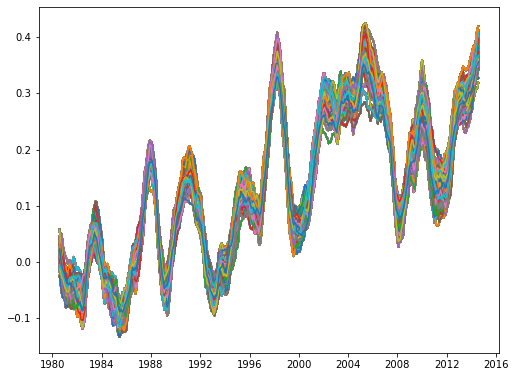

In [62]:
fig = plt.figure(figsize=(16,16))

ax = fig.add_axes([0.05,0.7,0.4,0.3])

amip6_tas_12m_stack = amip6_tas_12m.stack(z=('model','member'))
amip6_tas_12m_stack = amip6_tas_12m_stack.where( ~np.isnan(amip6_tas_12m_stack.isel(time=200)), drop=True)
#amip6_tas_12m_stack = amip6_tas_12m_stack.dropna('z')

for iz in np.arange(0,amip6_tas_12m_stack.z.size,1):
    ax.plot(amip6_tas_12m_stack.time, amip6_tas_12m_stack.ocean)

/project/cas02/islas/miniconda3/envs/islaenv/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1396: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
/project/cas02/islas/miniconda3/envs/islaenv/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
/project/cas02/islas/miniconda3/envs/islaenv/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1396: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
/project/cas02/islas/miniconda3/envs/islaenv/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
/project/cas02/islas/miniconda3/envs/islaenv/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1396: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
/project/cas02/islas/miniconda3/envs/islaenv/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarnin

SystemExit: 

/project/cas02/islas/miniconda3/envs/islaenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3532: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


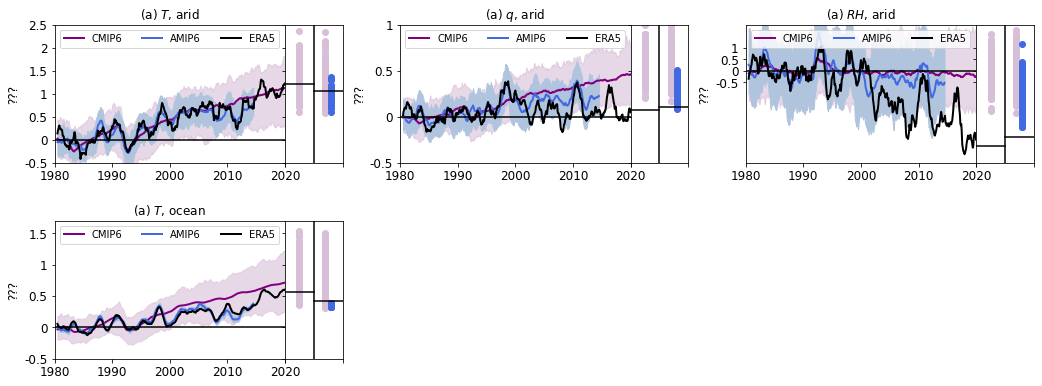

In [72]:
fig = plt.figure(figsize=(16,16))

ax = plotpanel(fig, 'arid', era5_tas_12m, cmip6_tas_12m, amip6_tas_12m, trend_era5_tas, trend_cmip6_tas, trend_amip6_tas_1980_2014, trend_cmip6_tas_1980_2014, trend_era5_tas_1980_2014,
               [-0.5,2.5],[-0.5,0,0.5,1,1.5,2,2.5],
               '(a) $T$, arid',0.02,0.22,0.8,0.92)

ax = plotpanel(fig, 'ocean', era5_tas_12m, cmip6_tas_12m, amip6_tas_12m, trend_era5_tas, trend_cmip6_tas, trend_amip6_tas_1980_2014, trend_cmip6_tas_1980_2014, trend_era5_tas_1980_2014,
               [-0.5,1.7],[-0.5,0,0.5,1,1.5],
               '(a) $T$, ocean',0.02,0.22,0.63,0.75)

ax = plotpanel(fig, 'arid', era5_q_12m, cmip6_q_12m, amip6_q_12m, trend_era5_q, trend_cmip6_q, trend_amip6_q_1980_2014, trend_cmip6_q_1980_2014, trend_era5_q_1980_2014,
               [-0.5,1],[-0.5,0,0.5,1],
               '(a) $q$, arid',0.32,0.52,0.8,0.92)

ax = plotpanel(fig, 'arid', era5_relhum_12m, cmip6_relhum_12m, amip6_relhum_12m, trend_era5_relhum, trend_cmip6_relhum, trend_amip6_relhum_1980_2014, 
               trend_cmip6_relhum_1980_2014, trend_era5_relhum_1980_2014,
               [-4,2],[-0.5,0,0.5,1],
               '(a) $RH$, arid',0.62,0.82,0.8,0.92)



#ax = plotpanel(fig, 'allland', era5_tas_12m, cmip6_tas_12m, amip6_tas_12m, trend_era5_tas, trend_cmip6_tas, trend_amip6_tas_1980_2014, trend_cmip6_tas_1980_2014, trend_era5_tas_1980_2014,
#               [-0.5,2.5],[-0.5,0,0.5,1,1.5,2,2.5],
#               '(a) $T$, all land',0.02,0.22,0.8,0.92)

#ax = plotpanel(fig, 'humid', era5_tas_12m, cmip6_tas_12m, amip6_tas_12m, trend_era5_tas, trend_cmip6_tas, trend_amip6_tas_1980_2014, trend_cmip6_tas_1980_2014, trend_era5_tas_1980_2014,
#               [-0.5,2.5],[-0.5,0,0.5,1,1.5,2,2.5],
#               '(a) $T$, all land',0.02,0.22,0.63,0.75)





sys.exit()




#-----trends
ax = fig.add_axes([0.22,0.8,0.05,0.12])
ax.set_ylim(-0.5,2.4)
ax.set_xlim(0,2)
ax.set_xticks([0,2])
ax.set_xticklabels([' ',' '])
ax.set_yticks([-0.5,0,0.5,1,1.5,2])
ax.set_yticklabels([' ',' ',' ',' ',' ',' '])

ax.plot(np.zeros(trend_cmip6_tas.z.size) + 0.5, trend_cmip6_tas.allland, "o", color='thistle')
ax.plot([0,1],[trend_era5_tas.allland, trend_era5_tas.allland], color='black')

ax.plot(np.zeros(trend_cmip6_tas_1980_2014.z.size) + 1.4, trend_cmip6_tas_1980_2014.allland,"o", color="thistle")
ax.plot(np.zeros(trend_amip6_tas_1980_2014.z.size) + 1.6, trend_amip6_tas_1980_2014.allland,"o", color="royalblue")
ax.plot([1,2],[trend_era5_tas_1980_2014.allland, trend_era5_tas_1980_2014.allland], color='black')

ax.plot([1,1],[-0.5,2.4], color='black')
ax.plot([0,2],[0,0], color='black')
#-------------------------------------------end all land tas


#-----------------------------------arid, ts
ax = fig.add_axes([0.02,0.4,0.2,0.12])
#ax.set_ylim(-0.4,1)
#ax.set_yticks([-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])
#ax.set_yticklabels(['-0.4','-0.2','0.0','0.2','0.4','0.6','0.8','1.0'], fontsize=12)
ax.set_xticks([1980,1990,2000,2010,2020])
ax.set_xticklabels(['1980','1990','2000','2010','2020'], fontsize=12)
ax.set_xlim(1980,2020)
#ax.set_title('Specific humidity, arid/semi-arid land', fontsize=16)
#ax.set_ylabel('Specific humidity (g/kg)', fontsize=12)

min95_cmip6 = cmip6_tas_12m_stack.arid.quantile(0.025, dim='z')
max95_cmip6 = cmip6_tas_12m_stack.arid.quantile(0.975, dim='z')
ax.fill_between(timemonth_cmip, min95_cmip6, max95_cmip6, color='thistle', alpha=0.6)

min95_amip = amip6_tas_12m_stack.arid.quantile(0.025, dim='z')
max95_amip = amip6_tas_12m_stack.arid.quantile(0.975, dim='z')
ax.fill_between(timemonth_amip, min95_amip, max95_amip, color='lightsteelblue')

ax.plot(timemonth_cmip, cmip6_tas_em.arid, color='purple', linewidth=2, label='CMIP6')   
ax.plot(timemonth_amip, amip6_tas_em.arid, color='royalblue', linewidth=2, label='AMIP6')
ax.plot(timemonth, era5_tas_12m.arid, color='black', linewidth=2, label='ERA5')

ax.legend(ncol=3, loc='upper left')

ax.plot([1980,2020],[0,0], color='black')


#-----trends
ax = fig.add_axes([0.22,0.2,0.05,0.12])
#ax.set_ylim(-0.5,2.4)
ax.set_xlim(0,2)
ax.set_xticks([0,2])
ax.set_xticklabels([' ',' '])
#ax.set_yticks([-0.5,0,0.5,1,1.5,2])
#ax.set_yticklabels([' ',' ',' ',' ',' ',' '])

ax.plot(np.zeros(trend_cmip6_tas.z.size) + 0.5, trend_cmip6_tas.arid, "o", color='thistle')
ax.plot([0,1],[trend_era5_tas.allland, trend_era5_tas.arid], color='black')

ax.plot(np.zeros(trend_cmip6_tas_1980_2014.z.size) + 1.4, trend_cmip6_tas_1980_2014.arid,"o", color="thistle")
ax.plot(np.zeros(trend_amip6_tas_1980_2014.z.size) + 1.6, trend_amip6_tas_1980_2014.arid,"o", color="royalblue")
ax.plot([1,2],[trend_era5_tas_1980_2014.arid, trend_era5_tas_1980_2014.arid], color='black')

ax.plot([1,1],[-0.5,2.4], color='black')
ax.plot([0,2],[0,0], color='black')







sys.exit()


#-----------------------------------humid q
ax = fig.add_axes([0.05,0.6,0.3,0.15])
#ax.set_ylim(-0.4,1)
ax.set_xlim(1980,2020)
ax.set_yticks([-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])
ax.set_yticklabels(['-0.4','-0.2','0.0','0.2','0.4','0.6','0.8','1.0'], fontsize=12)
ax.set_xticks([1980,1985,1990,1995,2000,2005,2010,2015,2020])
ax.set_xticklabels(['1980','1985','1990','1995','2000','2005','2010','2015','2020'], fontsize=12)
ax.set_title('(c) T2m, humid land', fontsize=16)
ax.set_ylabel('Temperature (K)', fontsize=12)

min95_cmip6 = cmip6_tas_12m_stack.humid.quantile(0.025, dim='z')
max95_cmip6 = cmip6_tas_12m_stack.humid.quantile(0.975, dim='z')
ax.fill_between(timemonth_cmip, min95_cmip6, max95_cmip6, color='thistle', alpha=0.6)

min95_amip = amip6_tas_12m_stack.humid.quantile(0.025, dim='z')
max95_amip = amip6_tas_12m_stack.humid.quantile(0.975, dim='z')
ax.fill_between(timemonth_amip, min95_amip, max95_amip, color='lightsteelblue')

ax.plot(timemonth_cmip, cmip6_tas_em.humid, color='purple', linewidth=2, label='CMIP6')   
ax.plot(timemonth_amip, amip6_tas_em.humid, color='royalblue', linewidth=2, label='AMIP6')
ax.plot(timemonth, era5_tas_12m.humid, color='black', linewidth=2, label='ERA5')

ax.legend(ncol=3, loc='upper left')

ax.plot([1980,2020],[0,0], color='black')




#-----------------------------------arid, q
ax = fig.add_axes([0.05,0.4,0.3,0.15])
#ax.set_ylim(-0.4,1)
#ax.set_yticks([-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])
#ax.set_yticklabels(['-0.4','-0.2','0.0','0.2','0.4','0.6','0.8','1.0'], fontsize=12)
ax.set_xticks([1980,1985,1990,1995,2000,2005,2010,2015,2020])
ax.set_xticklabels(['1980','1985','1990','1995','2000','2005','2010','2015','2020'], fontsize=12)
ax.set_xlim(1980,2020)
#ax.set_title('Specific humidity, arid/semi-arid land', fontsize=16)
#ax.set_ylabel('Specific humidity (g/kg)', fontsize=12)

min95_cmip6 = cmip6_tas_12m_stack.arid.quantile(0.025, dim='z')
max95_cmip6 = cmip6_tas_12m_stack.arid.quantile(0.975, dim='z')
ax.fill_between(timemonth_cmip, min95_cmip6, max95_cmip6, color='thistle', alpha=0.6)

min95_amip = amip6_tas_12m_stack.arid.quantile(0.025, dim='z')
max95_amip = amip6_tas_12m_stack.arid.quantile(0.975, dim='z')
ax.fill_between(timemonth_amip, min95_amip, max95_amip, color='lightsteelblue')

ax.plot(timemonth_cmip, cmip6_tas_em.arid, color='purple', linewidth=2, label='CMIP6')   
ax.plot(timemonth_amip, amip6_tas_em.arid, color='royalblue', linewidth=2, label='AMIP6')
ax.plot(timemonth, era5_tas_12m.arid, color='black', linewidth=2, label='ERA5')

ax.legend(ncol=3, loc='upper left')

ax.plot([1980,2020],[0,0], color='black')




#-----------------------------------arid, q
ax = fig.add_axes([0.05,0.2,0.3,0.15])
#ax.set_ylim(-0.4,1)
#ax.set_yticks([-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])
#ax.set_yticklabels(['-0.4','-0.2','0.0','0.2','0.4','0.6','0.8','1.0'], fontsize=12)
ax.set_xticks([1980,1985,1990,1995,2000,2005,2010,2015,2020])
ax.set_xticklabels(['1980','1985','1990','1995','2000','2005','2010','2015','2020'], fontsize=12)
ax.set_xlim(1980,2020)
#ax.set_title('Specific humidity, arid/semi-arid land', fontsize=16)
#ax.set_ylabel('Specific humidity (g/kg)', fontsize=12)

min95_cmip6 = cmip6_tas_12m_stack.ocean.quantile(0.025, dim='z')
max95_cmip6 = cmip6_tas_12m_stack.ocean.quantile(0.975, dim='z')
ax.fill_between(timemonth_cmip, min95_cmip6, max95_cmip6, color='thistle', alpha=0.6)

min95_amip = amip6_tas_12m_stack.ocean.quantile(0.025, dim='z')
max95_amip = amip6_tas_12m_stack.ocean.quantile(0.975, dim='z')
ax.fill_between(timemonth_amip, min95_amip, max95_amip, color='lightsteelblue')

ax.plot(timemonth_cmip, cmip6_tas_em.ocean, color='purple', linewidth=2, label='CMIP6')   
ax.plot(timemonth_amip, amip6_tas_em.ocean, color='royalblue', linewidth=2, label='AMIP6')
ax.plot(timemonth, era5_tas_12m.ocean, color='black', linewidth=2, label='ERA5')

ax.legend(ncol=3, loc='upper left')

ax.plot([1980,2020],[0,0], color='black')


#-----------------------------------arid, q
ax = fig.add_axes([0.05,0.,0.3,0.15])
#ax.set_ylim(-0.4,1)
#ax.set_yticks([-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])
#ax.set_yticklabels(['-0.4','-0.2','0.0','0.2','0.4','0.6','0.8','1.0'], fontsize=12)
ax.set_xticks([1980,1985,1990,1995,2000,2005,2010,2015,2020])
ax.set_xticklabels(['1980','1985','1990','1995','2000','2005','2010','2015','2020'], fontsize=12)
ax.set_xlim(1980,2020)
#ax.set_title('Specific humidity, arid/semi-arid land', fontsize=16)
#ax.set_ylabel('Specific humidity (g/kg)', fontsize=12)

diff_cmip6 = cmip6_tas_12m_stack.arid - cmip6_tas_12m_stack.ocean
diff_amip6 = amip6_tas_12m_stack.arid - amip6_tas_12m_stack.ocean


min95_cmip6 = diff_cmip6.quantile(0.025, dim='z')
max95_cmip6 = diff_cmip6.quantile(0.975, dim='z')
ax.fill_between(timemonth_cmip, min95_cmip6, max95_cmip6, color='thistle', alpha=0.6)

min95_amip = diff_amip6.quantile(0.025, dim='z')
max95_amip = diff_amip6.quantile(0.975, dim='z')
ax.fill_between(timemonth_amip, min95_amip, max95_amip, color='lightsteelblue')

ax.plot(timemonth_cmip, cmip6_tas_em.arid - cmip6_tas_em.ocean, color='purple', linewidth=2, label='CMIP6')   
ax.plot(timemonth_amip, amip6_tas_em.arid - amip6_tas_em.ocean, color='royalblue', linewidth=2, label='AMIP6')
ax.plot(timemonth, era5_tas_12m.arid - era5_tas_12m.ocean, color='black', linewidth=2, label='ERA5')

ax.legend(ncol=3, loc='upper left')

ax.plot([1980,2020],[0,0], color='black')


/project/cas02/islas/miniconda3/envs/islaenv/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1396: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
/project/cas02/islas/miniconda3/envs/islaenv/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1396: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
/project/cas02/islas/miniconda3/envs/islaenv/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1396: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
/project/cas02/islas/miniconda3/envs/islaenv/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1396: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
/project/cas02/islas/miniconda3/envs/islaenv/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1396: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
/project/cas02/islas/miniconda3/envs/islaenv/lib/python3.7/site-packages/numpy/lib/nanfunctions

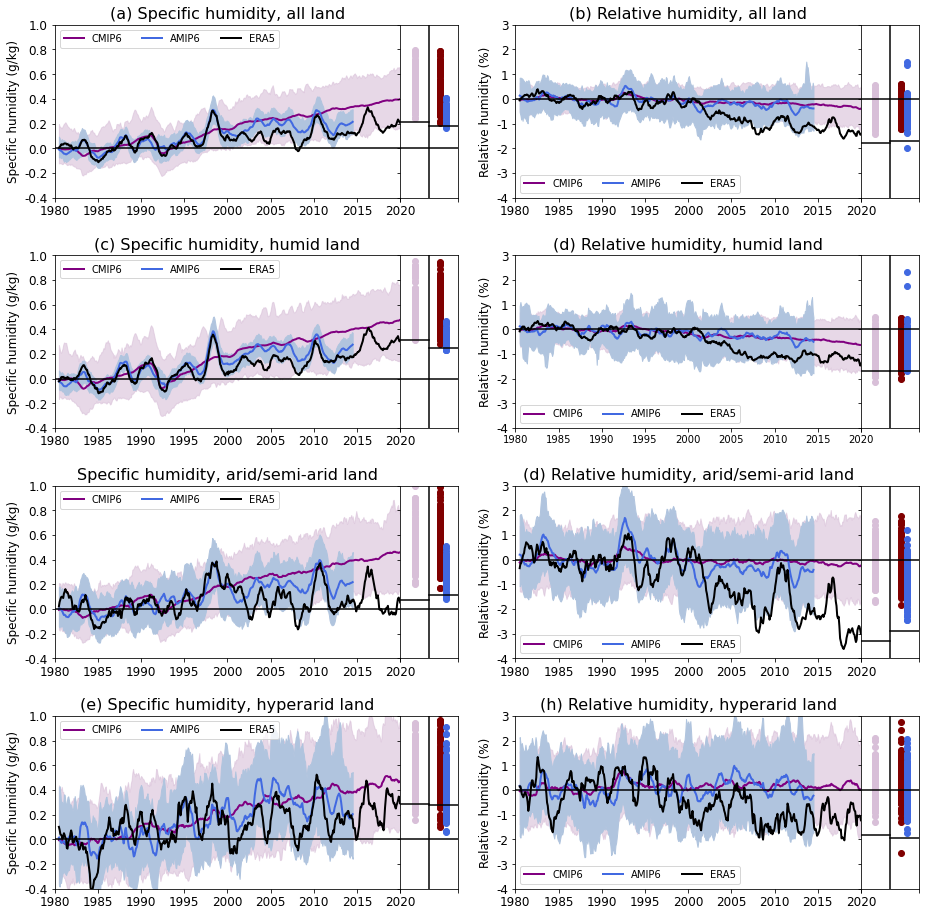

In [7]:
fig = plt.figure(figsize=(16,16))

#-----------------------------------allland, q
ax = fig.add_axes([0.05,0.8,0.3,0.15])
ax.set_ylim(-0.4,1)
ax.set_yticks([-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])
ax.set_yticklabels(['-0.4','-0.2','0.0','0.2','0.4','0.6','0.8','1.0'], fontsize=12)
ax.set_xlim(1980,2020)
ax.set_xticks([1980,1985,1990,1995,2000,2005,2010,2015,2020])
ax.set_xticklabels(['1980','1985','1990','1995','2000','2005','2010','2015','2020'], fontsize=12)
ax.set_title('(a) Specific humidity, all land', fontsize=16)
ax.set_ylabel('Specific humidity (g/kg)', fontsize=12)

min95_cmip6 = cmip6_q_12m_stack.allland.quantile(0.025, dim='z')
max95_cmip6 = cmip6_q_12m_stack.allland.quantile(0.975, dim='z')
ax.fill_between(timemonth_cmip, min95_cmip6, max95_cmip6, color='thistle', alpha=0.6)

min95_amip = amip6_q_12m_stack.allland.quantile(0.025, dim='z')
max95_amip = amip6_q_12m_stack.allland.quantile(0.975, dim='z')
ax.fill_between(timemonth_amip, min95_amip, max95_amip, color='lightsteelblue')

ax.plot(timemonth_cmip, cmip6_q_em.allland, color='purple', linewidth=2, label='CMIP6')   
ax.plot(timemonth_amip, amip6_q_em.allland, color='royalblue', linewidth=2, label='AMIP6')
ax.plot(timemonth, era5_q_12m.allland, color='black', linewidth=2, label='ERA5')

ax.plot([1980,2020],[0,0], color='black')

ax.legend(ncol=3, loc='upper left')

#-----trends
ax = fig.add_axes([0.35,0.8,0.05,0.15])
ax.set_ylim(-0.4,1)
ax.set_xlim(0,2)
ax.set_xticks([0,2])
ax.set_xticklabels([' ',' '])
ax.set_yticks([-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])
ax.set_yticklabels([' ',' ',' ',' ',' ',' ',' ',' '])

ax.plot(np.zeros(trend_cmip6_q.z.size) + 0.5, trend_cmip6_q.allland, "o", color='thistle')
ax.plot([0,1],[trend_era5_q.allland, trend_era5_q.allland], color='black')

ax.plot(np.zeros(trend_cmip6_q_1980_2014.z.size) + 1.4, trend_cmip6_q_1980_2014.allland,"o", color="maroon")
ax.plot(np.zeros(trend_amip6_q_1980_2014.z.size) + 1.6, trend_amip6_q_1980_2014.allland,"o", color="royalblue")
ax.plot([1,2],[trend_era5_q_1980_2014.allland, trend_era5_q_1980_2014.allland], color='black')

ax.plot([1,1],[-0.4,1], color='black')
ax.plot([0,2],[0,0], color='black')

#-----------------------------------allland, relhum
ax = fig.add_axes([0.45,0.8,0.3,0.15])
ax.set_ylim(-4,3)
ax.set_yticks([-4,-3,-2,-1,0,1,2,3])
ax.set_yticklabels(['-4','-3','-2','-1','0','1','2','3'], fontsize=12)
ax.set_xlim(1980,2020)
ax.set_xticks([1980,1985,1990,1995,2000,2005,2010,2015,2020])
ax.set_xticklabels(['1980','1985','1990','1995','2000','2005','2010','2015','2020'], fontsize=12)
ax.set_title('(b) Relative humidity, all land', fontsize=16)
ax.set_ylabel('Relative humidity (%)', fontsize=12)

min95_cmip6 = cmip6_relhum_12m_stack.allland.quantile(0.025, dim='z')
max95_cmip6 = cmip6_relhum_12m_stack.allland.quantile(0.975, dim='z')
ax.fill_between(timemonth_cmip, min95_cmip6, max95_cmip6, color='thistle', alpha=0.6)

min95_amip = amip6_relhum_12m_stack.allland.quantile(0.025, dim='z')
max95_amip = amip6_relhum_12m_stack.allland.quantile(0.975, dim='z')
ax.fill_between(timemonth_amip, min95_amip, max95_amip, color='lightsteelblue')

ax.plot(timemonth_cmip, cmip6_relhum_em.allland, color='purple', linewidth=2, label='CMIP6')   
ax.plot(timemonth_amip, amip6_relhum_em.allland, color='royalblue', linewidth=2, label='AMIP6')
ax.plot(timemonth, era5_relhum_12m.allland, color='black', linewidth=2, label='ERA5')

ax.plot([1980,2020],[0,0], color='black')

ax.legend(ncol=3, loc = 'lower left')

#-----trends
ax = fig.add_axes([0.75,0.8,0.05,0.15])
ax.set_ylim(-4,3)
ax.set_xlim(0,2)
ax.set_xticks([0,2])
ax.set_xticklabels([' ',' '])
ax.set_yticks([-4,-3,-2,-1,0,1,2,3])
ax.set_yticklabels([' ',' ',' ',' ',' ',' ',' ',' '])

ax.plot(np.zeros(trend_cmip6_relhum.z.size) + 0.5, trend_cmip6_relhum.allland, "o", color='thistle')
ax.plot([0,1],[trend_era5_relhum.allland, trend_era5_relhum.allland], color='black')

ax.plot(np.zeros(trend_cmip6_relhum_1980_2014.z.size) + 1.4, trend_cmip6_relhum_1980_2014.allland,"o", color="maroon")
ax.plot(np.zeros(trend_amip6_relhum_1980_2014.z.size) + 1.6, trend_amip6_relhum_1980_2014.allland,"o", color="royalblue")
ax.plot([1,2],[trend_era5_relhum_1980_2014.allland, trend_era5_relhum_1980_2014.allland], color='black')

ax.plot([1,1],[-4,3], color='black')
ax.plot([0,2],[0,0], color='black')

#-----------------------------------humid q
ax = fig.add_axes([0.05,0.6,0.3,0.15])
ax.set_ylim(-0.4,1)
ax.set_xlim(1980,2020)
ax.set_yticks([-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])
ax.set_yticklabels(['-0.4','-0.2','0.0','0.2','0.4','0.6','0.8','1.0'], fontsize=12)
ax.set_xticks([1980,1985,1990,1995,2000,2005,2010,2015,2020])
ax.set_xticklabels(['1980','1985','1990','1995','2000','2005','2010','2015','2020'], fontsize=12)
ax.set_title('(c) Specific humidity, humid land', fontsize=16)
ax.set_ylabel('Specific humidity (g/kg)', fontsize=12)

min95_cmip6 = cmip6_q_12m_stack.humid.quantile(0.025, dim='z')
max95_cmip6 = cmip6_q_12m_stack.humid.quantile(0.975, dim='z')
ax.fill_between(timemonth_cmip, min95_cmip6, max95_cmip6, color='thistle', alpha=0.6)

min95_amip = amip6_q_12m_stack.humid.quantile(0.025, dim='z')
max95_amip = amip6_q_12m_stack.humid.quantile(0.975, dim='z')
ax.fill_between(timemonth_amip, min95_amip, max95_amip, color='lightsteelblue')

ax.plot(timemonth_cmip, cmip6_q_em.humid, color='purple', linewidth=2, label='CMIP6')   
ax.plot(timemonth_amip, amip6_q_em.humid, color='royalblue', linewidth=2, label='AMIP6')
ax.plot(timemonth, era5_q_12m.humid, color='black', linewidth=2, label='ERA5')

ax.legend(ncol=3, loc='upper left')

ax.plot([1980,2020],[0,0], color='black')

#-----trends
ax = fig.add_axes([0.35,0.6,0.05,0.15])
ax.set_ylim(-0.4,1)
ax.set_xlim(0,2)
ax.set_xticks([0,2])
ax.set_xticklabels([' ',' '])
ax.set_yticks([-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])
ax.set_yticklabels([' ',' ',' ',' ',' ',' ',' ',' '])
ax.plot(np.zeros(trend_cmip6_q.z.size) + 0.5, trend_cmip6_q.humid, "o", color='thistle')
ax.plot([0,1],[trend_era5_q.humid, trend_era5_q.humid], color='black')

ax.plot(np.zeros(trend_cmip6_q_1980_2014.z.size) + 1.4, trend_cmip6_q_1980_2014.humid,"o", color="maroon")
ax.plot(np.zeros(trend_amip6_q_1980_2014.z.size) + 1.6, trend_amip6_q_1980_2014.humid,"o", color="royalblue")
ax.plot([1,2],[trend_era5_q_1980_2014.humid, trend_era5_q_1980_2014.humid], color='black')

ax.plot([1,1],[-0.4,1], color='black')
ax.plot([0,2],[0,0], color='black')

#-----------------------------------humid, relhum
ax = fig.add_axes([0.45,0.6,0.3,0.15])
ax.set_ylim(-4,3)
ax.set_yticks([-4,-3,-2,-1,0,1,2,3])
ax.set_yticklabels(['-4','-3','-2','-1','0','1','2','3'], fontsize=12)
ax.set_xticks([1980,1985,1990,1995,2000,2005,2010,2015,2020])
ax.set_xticklabels(['1980','1985','1990','1995','2000','2005','2010','2015','2020'])
ax.set_xlim(1980,2020)
ax.set_title('(d) Relative humidity, humid land', fontsize=16)
ax.set_ylabel('Relative humidity (%)', fontsize=12)

min95_cmip6 = cmip6_relhum_12m_stack.humid.quantile(0.025, dim='z')
max95_cmip6 = cmip6_relhum_12m_stack.humid.quantile(0.975, dim='z')
ax.fill_between(timemonth_cmip, min95_cmip6, max95_cmip6, color='thistle', alpha=0.6)

min95_amip = amip6_relhum_12m_stack.humid.quantile(0.025, dim='z')
max95_amip = amip6_relhum_12m_stack.humid.quantile(0.975, dim='z')
ax.fill_between(timemonth_amip, min95_amip, max95_amip, color='lightsteelblue')

ax.plot(timemonth_cmip, cmip6_relhum_em.humid, color='purple', linewidth=2, label='CMIP6')   
ax.plot(timemonth_amip, amip6_relhum_em.humid, color='royalblue', linewidth=2, label='AMIP6')
ax.plot(timemonth, era5_relhum_12m.humid, color='black', linewidth=2, label='ERA5')

ax.legend(ncol=3, loc='lower left')

ax.plot([1980,2020],[0,0], color='black')

#-----trends
ax = fig.add_axes([0.75,0.6,0.05,0.15])
ax.set_ylim(-4,3)
ax.set_xlim(0,2)
ax.set_xticks([0,2])
ax.set_xticklabels([' ',' '])
ax.set_yticks([-4,-3,-2,-1,0,1,2,3])
ax.set_yticklabels([' ',' ',' ',' ',' ',' ',' ',' '])
ax.plot(np.zeros(trend_cmip6_relhum.z.size) + 0.5, trend_cmip6_relhum.humid, "o", color='thistle')
ax.plot([0,1],[trend_era5_relhum.humid, trend_era5_relhum.humid], color='black')

ax.plot(np.zeros(trend_cmip6_relhum_1980_2014.z.size) + 1.4, trend_cmip6_relhum_1980_2014.humid,"o", color="maroon")
ax.plot(np.zeros(trend_amip6_relhum_1980_2014.z.size) + 1.6, trend_amip6_relhum_1980_2014.humid,"o", color="royalblue")
ax.plot([1,2],[trend_era5_relhum_1980_2014.humid, trend_era5_relhum_1980_2014.humid], color='black')


ax.plot([1,1],[-4,3], color='black')
ax.plot([0,2],[0,0], color='black')



#-----------------------------------arid, q
ax = fig.add_axes([0.05,0.4,0.3,0.15])
ax.set_ylim(-0.4,1)
ax.set_yticks([-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])
ax.set_yticklabels(['-0.4','-0.2','0.0','0.2','0.4','0.6','0.8','1.0'], fontsize=12)
ax.set_xticks([1980,1985,1990,1995,2000,2005,2010,2015,2020])
ax.set_xticklabels(['1980','1985','1990','1995','2000','2005','2010','2015','2020'], fontsize=12)
ax.set_xlim(1980,2020)
ax.set_title('Specific humidity, arid/semi-arid land', fontsize=16)
ax.set_ylabel('Specific humidity (g/kg)', fontsize=12)

min95_cmip6 = cmip6_q_12m_stack.arid.quantile(0.025, dim='z')
max95_cmip6 = cmip6_q_12m_stack.arid.quantile(0.975, dim='z')
ax.fill_between(timemonth_cmip, min95_cmip6, max95_cmip6, color='thistle', alpha=0.6)

min95_amip = amip6_q_12m_stack.arid.quantile(0.025, dim='z')
max95_amip = amip6_q_12m_stack.arid.quantile(0.975, dim='z')
ax.fill_between(timemonth_amip, min95_amip, max95_amip, color='lightsteelblue')

ax.plot(timemonth_cmip, cmip6_q_em.arid, color='purple', linewidth=2, label='CMIP6')   
ax.plot(timemonth_amip, amip6_q_em.arid, color='royalblue', linewidth=2, label='AMIP6')
ax.plot(timemonth, era5_q_12m.arid, color='black', linewidth=2, label='ERA5')

ax.legend(ncol=3, loc='upper left')

ax.plot([1980,2020],[0,0], color='black')

#-----trends
ax = fig.add_axes([0.35,0.4,0.05,0.15])
ax.set_ylim(-0.4,1)
ax.set_xlim(0,2)
ax.set_xticks([0,2])
ax.set_xticklabels([' ',' '])
ax.set_yticks([-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])
ax.set_yticklabels([' ',' ',' ',' ',' ',' ',' ',' '])
ax.plot(np.zeros(trend_cmip6_q.z.size) + 0.5, trend_cmip6_q.arid, "o", color='thistle')
ax.plot([0,1],[trend_era5_q.arid, trend_era5_q.arid], color='black')

ax.plot(np.zeros(trend_cmip6_q_1980_2014.z.size) + 1.4, trend_cmip6_q_1980_2014.arid,"o", color="maroon")
ax.plot(np.zeros(trend_amip6_q_1980_2014.z.size) + 1.6, trend_amip6_q_1980_2014.arid,"o", color="royalblue")
ax.plot([1,2],[trend_era5_q_1980_2014.arid, trend_era5_q_1980_2014.arid], color='black')

ax.plot([1,1],[-0.4,1], color='black')
ax.plot([0,2],[0,0], color='black')


#-----------------------------------arid, relhum
ax = fig.add_axes([0.45,0.4,0.3,0.15])
ax.set_ylim(-4,3)
ax.set_xlim(1980,2020)
ax.set_yticks([-4,-3,-2,-1,0,1,2,3])
ax.set_yticklabels(['-4','-3','-2','-1','0','1','2','3'], fontsize=12)
ax.set_xticks([1980,1985,1990,1995,2000,2005,2010,2015,2020])
ax.set_xticklabels(['1980','1985','1990','1995','2000','2005','2010','2015','2020'], fontsize=12)
ax.set_title('(d) Relative humidity, arid/semi-arid land', fontsize=16)
ax.set_ylabel('Relative humidity (%)', fontsize=12)


min95_cmip6 = cmip6_relhum_12m_stack.arid.quantile(0.025, dim='z')
max95_cmip6 = cmip6_relhum_12m_stack.arid.quantile(0.975, dim='z')
ax.fill_between(timemonth_cmip, min95_cmip6, max95_cmip6, color='thistle', alpha=0.6)

min95_amip = amip6_relhum_12m_stack.arid.quantile(0.025, dim='z')
max95_amip = amip6_relhum_12m_stack.arid.quantile(0.975, dim='z')
ax.fill_between(timemonth_amip, min95_amip, max95_amip, color='lightsteelblue')

ax.plot(timemonth_cmip, cmip6_relhum_em.arid, color='purple', linewidth=2, label='CMIP6')   
ax.plot(timemonth_amip, amip6_relhum_em.arid, color='royalblue', linewidth=2, label='AMIP6')
ax.plot(timemonth, era5_relhum_12m.arid, color='black', linewidth=2, label='ERA5')

ax.legend(ncol=3, loc='lower left')

ax.plot([1980,2020],[0,0], color='black')

#-----trends
ax = fig.add_axes([0.75,0.4,0.05,0.15])
ax.set_ylim(-4,3)
ax.set_xlim(0,2)
ax.set_xticks([0,2])
ax.set_xticklabels([' ',' '])
ax.set_yticks([-4,-3,-2,-1,0,1,2,3])
ax.set_yticklabels([' ',' ',' ',' ',' ',' ',' ',' '])
ax.plot(np.zeros(trend_cmip6_relhum.z.size) + 0.5, trend_cmip6_relhum.arid, "o", color='thistle')
ax.plot([0,1],[trend_era5_relhum.arid, trend_era5_relhum.arid], color='black')

ax.plot(np.zeros(trend_cmip6_relhum_1980_2014.z.size) + 1.4, trend_cmip6_relhum_1980_2014.arid,"o", color="maroon")
ax.plot(np.zeros(trend_amip6_relhum_1980_2014.z.size) + 1.6, trend_amip6_relhum_1980_2014.arid,"o", color="royalblue")
ax.plot([1,2],[trend_era5_relhum_1980_2014.arid, trend_era5_relhum_1980_2014.arid], color='black')

ax.plot([1,1],[-4,3], color='black')
ax.plot([0,2],[0,0], color='black')

#-----------------------------------hyperarid, q
ax = fig.add_axes([0.05,0.2,0.3,0.15])
ax.set_ylim(-0.4,1)
ax.set_yticks([-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])
ax.set_yticklabels(['-0.4','-0.2','0.0','0.2','0.4','0.6','0.8','1.0'], fontsize=12)
ax.set_xlim(1980,2020)
ax.set_xticks([1980,1985,1990,1995,2000,2005,2010,2015,2020])
ax.set_xticklabels(['1980','1985','1990','1995','2000','2005','2010','2015','2020'], fontsize=12)
ax.set_title('(e) Specific humidity, hyperarid land', fontsize=16)
ax.set_ylabel('Specific humidity (g/kg)', fontsize=12)

min95_cmip6 = cmip6_q_12m_stack.hyperarid.quantile(0.025, dim='z')
max95_cmip6 = cmip6_q_12m_stack.hyperarid.quantile(0.975, dim='z')
ax.fill_between(timemonth_cmip, min95_cmip6, max95_cmip6, color='thistle', alpha=0.6)

min95_amip = amip6_q_12m_stack.hyperarid.quantile(0.025, dim='z')
max95_amip = amip6_q_12m_stack.hyperarid.quantile(0.975, dim='z')
ax.fill_between(timemonth_amip, min95_amip, max95_amip, color='lightsteelblue')

ax.plot(timemonth_cmip, cmip6_q_em.hyperarid, color='purple', linewidth=2, label='CMIP6')   
ax.plot(timemonth_amip, amip6_q_em.hyperarid, color='royalblue', linewidth=2, label='AMIP6')
ax.plot(timemonth, era5_q_12m.hyperarid, color='black', linewidth=2, label='ERA5')

ax.legend(ncol=3, loc='upper left')

ax.plot([1980,2020],[0,0], color='black')

#-----trends
ax = fig.add_axes([0.35,0.2,0.05,0.15])
ax.set_ylim(-0.4,1)
ax.set_xlim(0,2)
ax.set_xticks([0,2])
ax.set_xticklabels([' ',' '])
ax.set_yticks([-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])
ax.set_yticklabels([' ',' ',' ',' ',' ',' ',' ',' '])
ax.plot(np.zeros(trend_cmip6_q.z.size) + 0.5, trend_cmip6_q.hyperarid, "o", color='thistle')
ax.plot([0,1],[trend_era5_q.hyperarid, trend_era5_q.hyperarid], color='black')

ax.plot(np.zeros(trend_cmip6_q_1980_2014.z.size) + 1.4, trend_cmip6_q_1980_2014.hyperarid,"o", color="maroon")
ax.plot(np.zeros(trend_amip6_q_1980_2014.z.size) + 1.6, trend_amip6_q_1980_2014.hyperarid,"o", color="royalblue")
ax.plot([1,2],[trend_era5_q_1980_2014.hyperarid, trend_era5_q_1980_2014.hyperarid], color='black')

ax.plot([1,1],[-0.4,1], color='black')
ax.plot([0,2],[0,0], color='black')

#-----------------------------------hyperarid, relhum
ax = fig.add_axes([0.45,0.2,0.3,0.15])
ax.set_ylim(-4,3)
ax.set_yticks([-4,-3,-2,-1,0,1,2,3])
ax.set_yticklabels(['-4','-3','-2','-1','0','1','2','3'], fontsize=12)
ax.set_xlim(1980,2020)
ax.set_xticks([1980,1985,1990,1995,2000,2005,2010,2015,2020])
ax.set_xticklabels(['1980','1985','1990','1995','2000','2005','2010','2015','2020'], fontsize=12)
ax.set_title('(h) Relative humidity, hyperarid land', fontsize=16)
ax.set_ylabel('Relative humidity (%)', fontsize=12)

min95_cmip6 = cmip6_relhum_12m_stack.hyperarid.quantile(0.025, dim='z')
max95_cmip6 = cmip6_relhum_12m_stack.hyperarid.quantile(0.975, dim='z')
ax.fill_between(timemonth_cmip, min95_cmip6, max95_cmip6, color='thistle', alpha=0.6)

min95_amip = amip6_relhum_12m_stack.hyperarid.quantile(0.025, dim='z')
max95_amip = amip6_relhum_12m_stack.hyperarid.quantile(0.975, dim='z')
ax.fill_between(timemonth_amip, min95_amip, max95_amip, color='lightsteelblue')

ax.plot(timemonth_cmip, cmip6_relhum_em.hyperarid, color='purple', linewidth=2, label='CMIP6')   
ax.plot(timemonth_amip, amip6_relhum_em.hyperarid, color='royalblue', linewidth=2, label='AMIP6')
ax.plot(timemonth, era5_relhum_12m.hyperarid, color='black', linewidth=2, label='ERA5')

ax.legend(ncol=3, loc = 'lower left')

ax.plot([1980,2020],[0,0], color='black')

#-----trends
ax = fig.add_axes([0.75,0.2,0.05,0.15])
ax.set_ylim(-4,3)
ax.set_xlim(0,2)
ax.set_xticks([0,2])
ax.set_xticklabels([' ',' '])
ax.set_yticks([-4,-3,-2,-1,0,1,2,3])
ax.set_yticklabels([' ',' ',' ',' ',' ',' ',' ',' '])
ax.plot(np.zeros(trend_cmip6_relhum.z.size) + 0.5, trend_cmip6_relhum.hyperarid, "o", color='thistle')
ax.plot([0,1],[trend_era5_relhum.hyperarid, trend_era5_relhum.hyperarid], color='black')

ax.plot(np.zeros(trend_cmip6_relhum_1980_2014.z.size) + 1.4, trend_cmip6_relhum_1980_2014.hyperarid,"o", color="maroon")
ax.plot(np.zeros(trend_amip6_relhum_1980_2014.z.size) + 1.6, trend_amip6_relhum_1980_2014.hyperarid,"o", color="royalblue")
ax.plot([1,2],[trend_era5_relhum_1980_2014.hyperarid, trend_era5_relhum_1980_2014.hyperarid], color='black')

ax.plot([1,1],[-4,3], color='black')
ax.plot([0,2],[0,0], color='black')

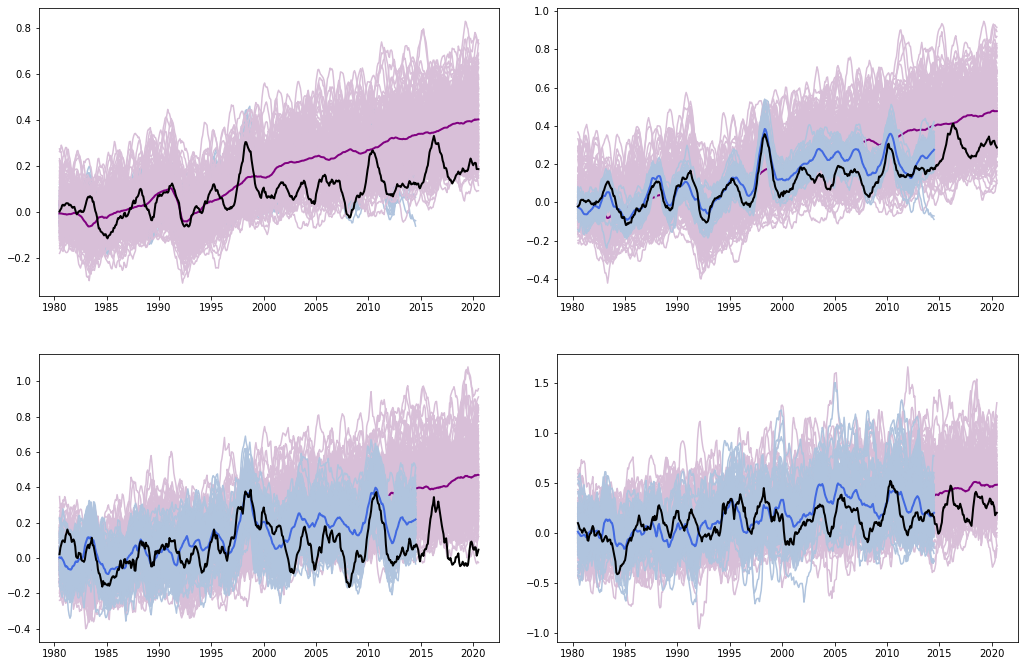

In [8]:
fig = plt.figure(figsize=(16,16))

ax = fig.add_axes([0.05,0.7,0.4,0.25])

for imem in np.arange(0,amip6_q_12m_stack.z.size,1):
    ax.plot(timemonth_amip, amip6_q_12m_stack.allland.isel(z=imem), color='lightsteelblue')
ax.plot(timemonth_amip, amip6_q_em.allland, color='royalblue', linewidth=2)

for imem in np.arange(0,cmip6_q_12m_stack.z.size,1):
    ax.plot(timemonth_cmip, cmip6_q_12m_stack.allland.isel(z=imem), color='thistle')
ax.plot(timemonth_cmip, cmip6_q_em.allland, color='purple', linewidth=2)

ax.plot(timemonth, era5_q_12m.allland, color='black', linewidth=2)



ax = fig.add_axes([0.5,0.7,0.4,0.25])

for imem in np.arange(0,cmip6_q_12m_stack.z.size,1):
    ax.plot(timemonth_cmip, cmip6_q_12m_stack.humid.isel(z=imem), color='thistle')
ax.plot(timemonth_cmip, cmip6_q_em.humid, color='purple', linewidth=2)

for imem in np.arange(0,amip6_q_12m_stack.z.size,1):
    ax.plot(timemonth_amip, amip6_q_12m_stack.humid.isel(z=imem), color='lightsteelblue')
ax.plot(timemonth_amip, amip6_q_em.humid, color='royalblue', linewidth=2)
    
ax.plot(timemonth, era5_q_12m.humid, color='black', linewidth=2)


ax = fig.add_axes([0.05,0.4,0.4,0.25])

for imem in np.arange(0,cmip6_q_12m_stack.z.size,1):
    ax.plot(timemonth_cmip, cmip6_q_12m_stack.arid.isel(z=imem), color='thistle')
ax.plot(timemonth_cmip, cmip6_q_em.arid, color='purple', linewidth=2)


for imem in np.arange(0,amip6_q_12m_stack.z.size,1):
    ax.plot(timemonth_amip, amip6_q_12m_stack.arid.isel(z=imem), color='lightsteelblue')
ax.plot(timemonth_amip, amip6_q_em.arid, color='royalblue', linewidth=2)

ax.plot(timemonth, era5_q_12m.arid, color='black', linewidth=2)


ax = fig.add_axes([0.5,0.4,0.4,0.25])

for imem in np.arange(0,cmip6_q_12m_stack.z.size,1):
    ax.plot(timemonth_cmip, cmip6_q_12m_stack.hyperarid.isel(z=imem), color='thistle')
ax.plot(timemonth_cmip, cmip6_q_em.hyperarid, color='purple', linewidth=2)

for imem in np.arange(0,amip6_q_12m_stack.z.size,1):
    ax.plot(timemonth_amip, amip6_q_12m_stack.hyperarid.isel(z=imem), color='lightsteelblue')
ax.plot(timemonth_amip, amip6_q_em.hyperarid, color='royalblue', linewidth=2)

ax.plot(timemonth, era5_q_12m.hyperarid, color='black', linewidth=2)



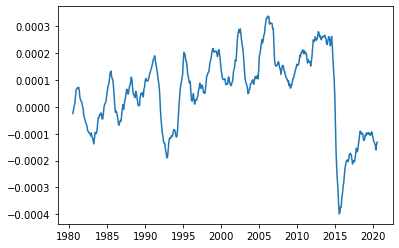

In [57]:
plt.plot(timemonth, cmip6_q_12m_stack.allland.sel(model='CIESM'))